In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
Input_data = pd.read_csv(r"C:\Users\rv\Downloads\1\iot_dataset.csv")
Input_data

,Sl.No,Patient ID,Temperature Data,Humidity Data,Gas Data,Target
0,1,1,32,20,0,1
1,2,2,32,22,1,1
2,3,1,32,18,0,1
3,4,2,32,21,1,1
4,5,1,32,19,0,1
...,...,...,...,...,...,...
145,146,2,32,21,0,2
146,147,1,32,20,1,2
147,148,2,32,21,0,1
148,149,1,32,20,1,2


In [9]:
Input_data.head()

,Sl.No,Patient ID,Temperature Data,Humidity Data,Gas Data,Target
0,1,1,32,20,0,1
1,2,2,32,22,1,1
2,3,1,32,18,0,1
3,4,2,32,21,1,1
4,5,1,32,19,0,1


In [10]:
Input_data.tail()

,Sl.No,Patient ID,Temperature Data,Humidity Data,Gas Data,Target
145,146,2,32,21,0,2
146,147,1,32,20,1,2
147,148,2,32,21,0,1
148,149,1,32,20,1,2
149,150,2,32,21,0,1


In [11]:
Input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sl.No             150 non-null    int64
 1   Patient ID        150 non-null    int64
 2   Temperature Data  150 non-null    int64
 3   Humidity Data     150 non-null    int64
 4   Gas Data          150 non-null    int64
 5   Target            150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [12]:
Input_data.isnull().sum()


Sl.No               0
Patient ID          0
Temperature Data    0
Humidity Data       0
Gas Data            0
Target              0
dtype: int64

In [13]:
Input_data['Target'].value_counts()

Target
0    59
1    56
2    35
Name: count, dtype: int64

In [14]:
Input_data.shape

(150, 6)

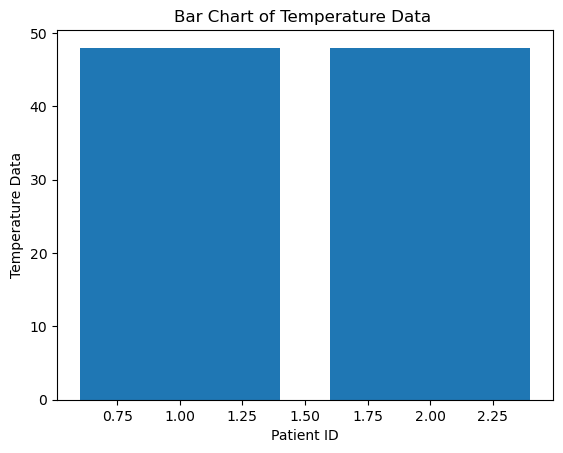

In [15]:
plt.bar(Input_data['Patient ID'],Input_data['Temperature Data']) 
plt.title("Bar Chart of Temperature Data ") 
plt.xlabel('Patient ID')
plt.ylabel('Temperature Data')
plt.show()

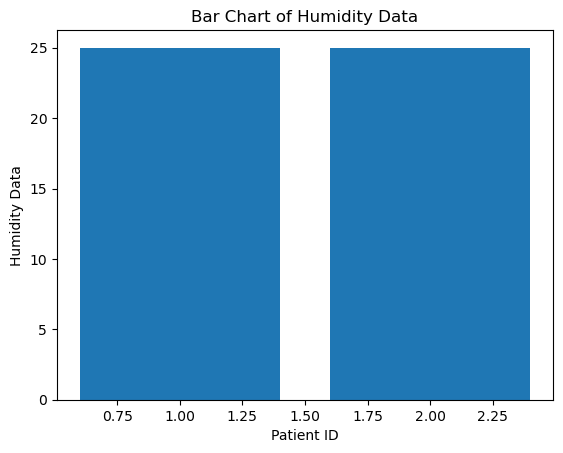

In [16]:
plt.bar(Input_data['Patient ID'],Input_data['Humidity Data']) 
plt.title("Bar Chart of Humidity Data") 
plt.xlabel('Patient ID')
plt.ylabel('Humidity Data')
plt.show()

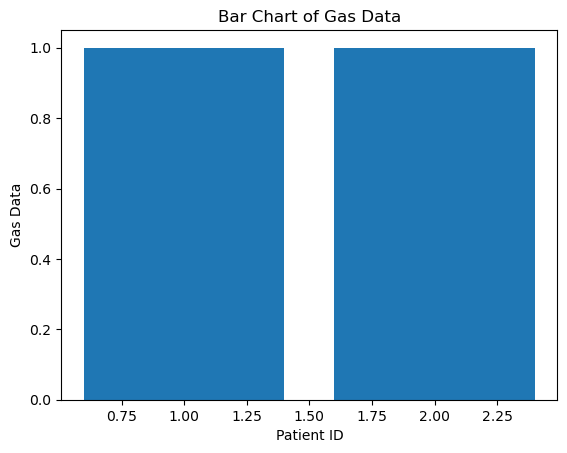

In [17]:
plt.bar(Input_data['Patient ID'],Input_data['Gas Data']) 
plt.title("Bar Chart of Gas Data") 
plt.xlabel('Patient ID')
plt.ylabel('Gas Data')
plt.show()

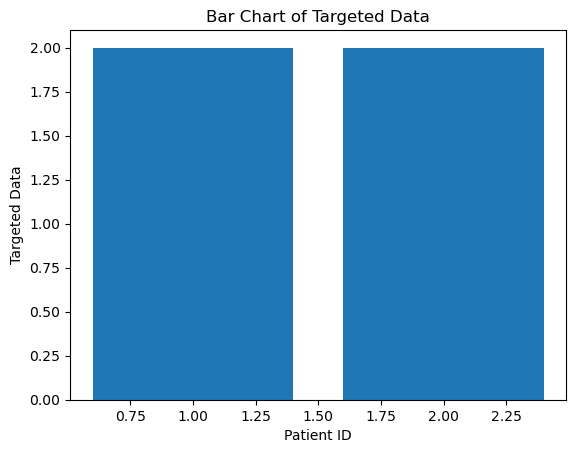

In [18]:
plt.bar(Input_data['Patient ID'],Input_data['Target']) 
plt.title("Bar Chart of Targeted Data") 
plt.xlabel('Patient ID')
plt.ylabel('Targeted Data')
plt.show()

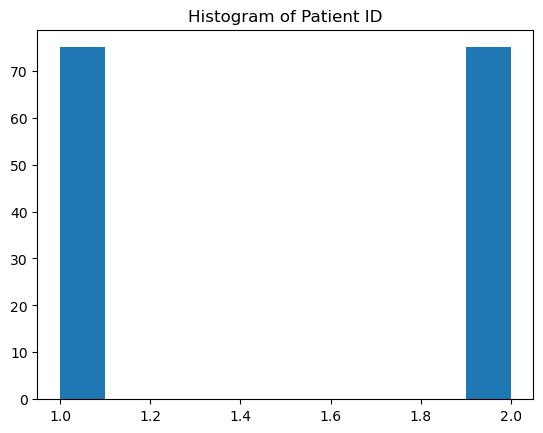

In [19]:
plt.hist(Input_data['Patient ID'])
plt.title("Histogram of Patient ID")
plt.show()

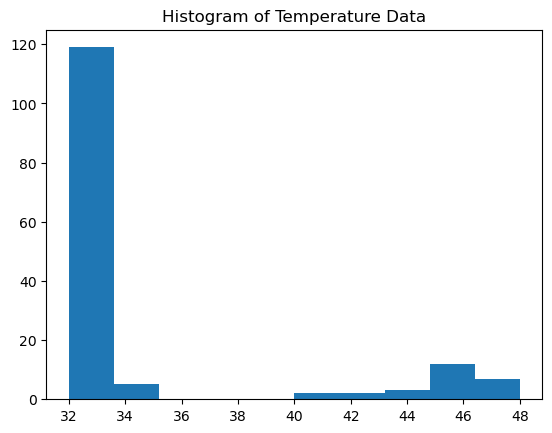

In [20]:
plt.hist(Input_data['Temperature Data'])
plt.title("Histogram of Temperature Data")
plt.show()

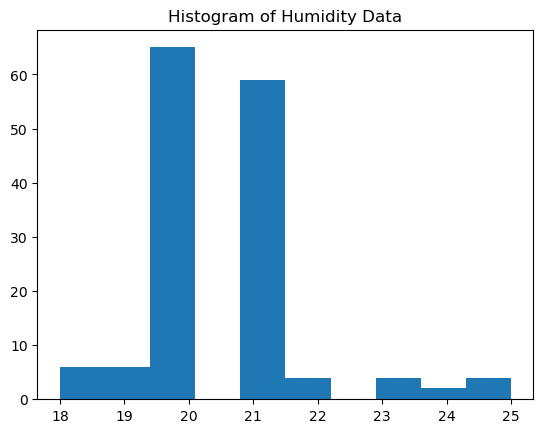

In [21]:
plt.hist(Input_data['Humidity Data'])
plt.title("Histogram of Humidity Data")
plt.show()

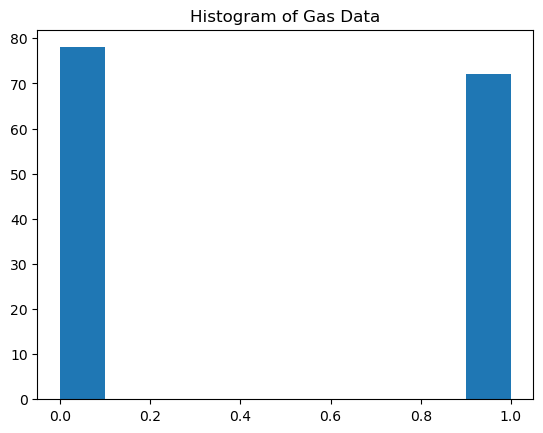

In [22]:
plt.hist(Input_data['Gas Data'])
plt.title("Histogram of Gas Data")
plt.show()

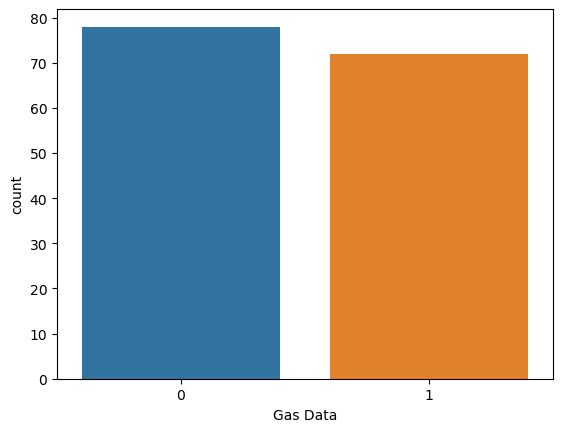

In [23]:
# count plot on single categorical variable
sns.countplot(x ='Gas Data', data = Input_data)
 
# Show the plot
plt.show()

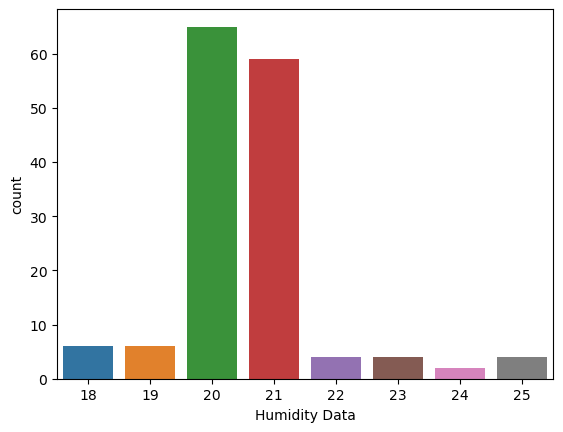

In [24]:
# count plot on single categorical variable
sns.countplot(x ='Humidity Data', data = Input_data)
 
# Show the plot
plt.show()

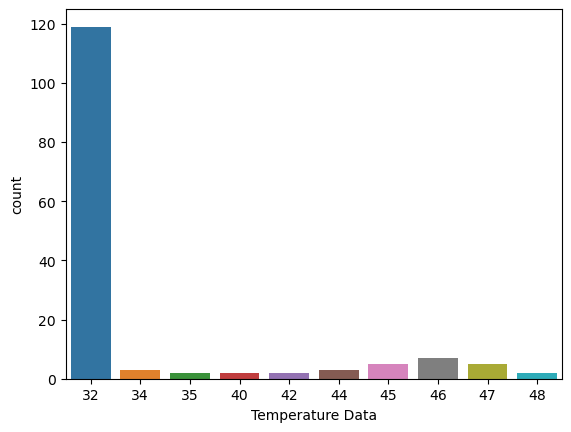

In [25]:
# count plot on single categorical variable
sns.countplot(x ='Temperature Data', data = Input_data)
 
# Show the plot
plt.show()

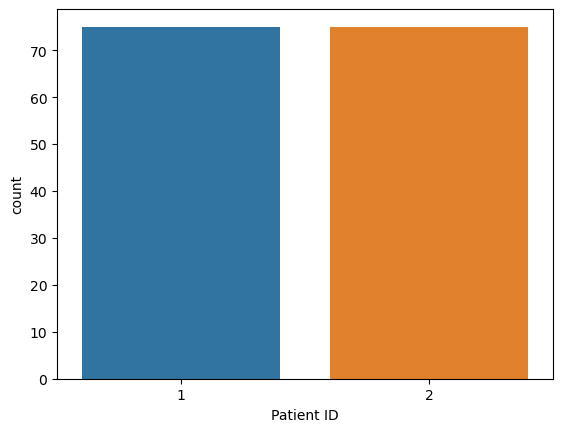

In [26]:
# count plot on single categorical variable
sns.countplot(x ='Patient ID', data = Input_data)
 
# Show the plot
plt.show()

<Axes: xlabel='Patient ID', ylabel='Density'>

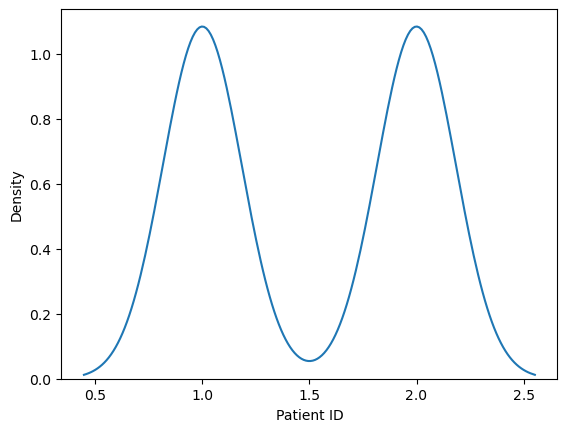

In [27]:
sns.kdeplot(Input_data['Patient ID'])

<Axes: xlabel='Temperature Data', ylabel='Density'>

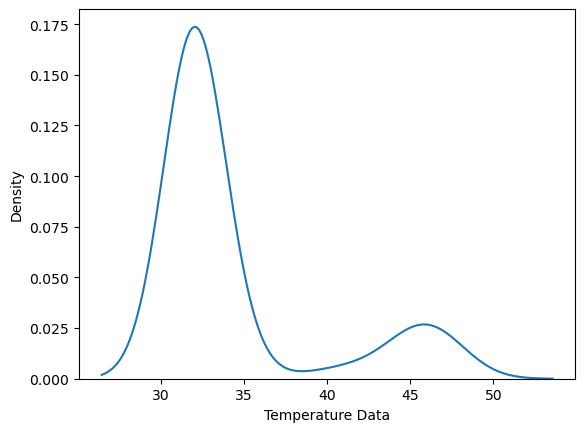

In [28]:
sns.kdeplot(Input_data['Temperature Data'])

<Axes: xlabel='Humidity Data', ylabel='Density'>

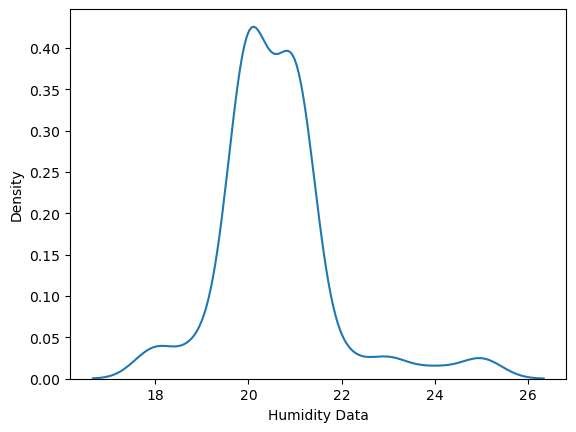

In [29]:
sns.kdeplot(Input_data['Humidity Data'])

<Axes: xlabel='Gas Data', ylabel='Density'>

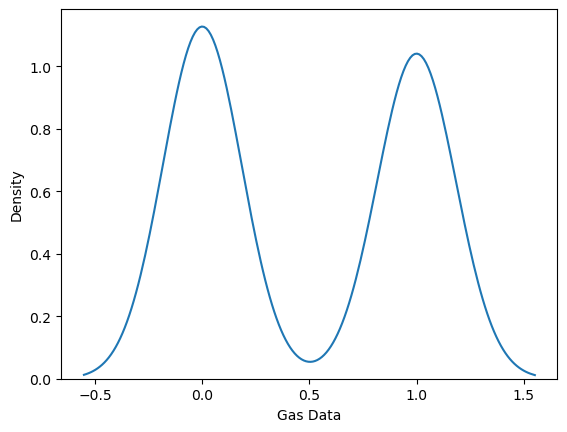

In [30]:
sns.kdeplot(Input_data['Gas Data'])

<Axes: xlabel='Target', ylabel='Density'>

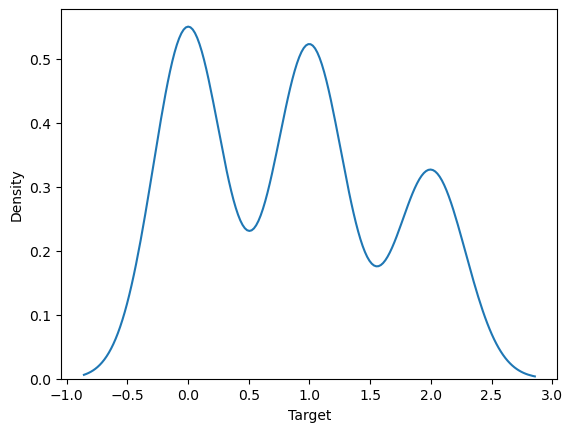

In [31]:
sns.kdeplot(Input_data['Target'])

<Axes: >

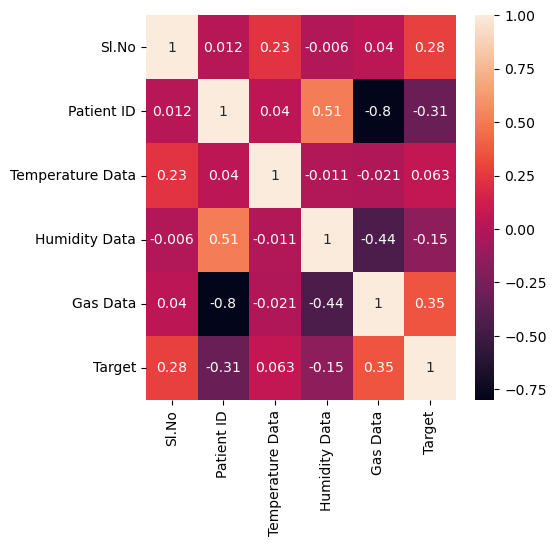

In [32]:
import seaborn as sns
corr = Input_data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True)

In [33]:
X = Input_data.drop('Target',axis=1)
X

,Sl.No,Patient ID,Temperature Data,Humidity Data,Gas Data
0,1,1,32,20,0
1,2,2,32,22,1
2,3,1,32,18,0
3,4,2,32,21,1
4,5,1,32,19,0
...,...,...,...,...,...
145,146,2,32,21,0
146,147,1,32,20,1
147,148,2,32,21,0
148,149,1,32,20,1


In [34]:
Y = Input_data['Target']
Y 

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    1
148    2
149    1
Name: Target, Length: 150, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics

# Assuming you have already defined x_train1, y_train1, x_test1, y_test1

# Impute missing values in x_train1
imputer = SimpleImputer(strategy='mean')
x_train1_imputed = imputer.fit_transform(x_train1)

# Instantiate the Multinomial Naive Bayes classifier
NB_Algorithm = MultinomialNB()

# Fit the classifier to the training data
NB_Algorithm.fit(x_train1_imputed, y_train1)

# Make predictions on the test data
NB_Algorithm_Prediction = NB_Algorithm.predict(x_test1)

# Calculate and print the accuracy
Accuracy_NB = metrics.accuracy_score(y_test1, NB_Algorithm_Prediction)
print('Accuracy of Naive Bayes Algorithm:', Accuracy_NB)


Accuracy of Naive Bayes Algorithm: 0.6666666666666666


In [38]:
NB_Algorithm_Prediction

array([0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.67      0.55      0.60        11
           2       0.64      0.70      0.67        10

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.66        30



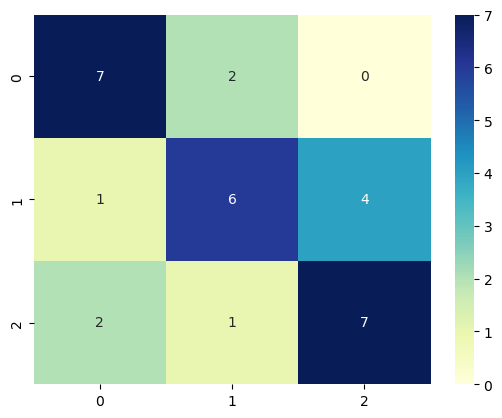

In [98]:
#classification report and Confusion matrix of Naive Bayes Algorithm
from sklearn.metrics import classification_report, confusion_matrix
CM_NB=confusion_matrix(y_test1, NB_Algorithm_Prediction)
sns.heatmap(CM_NB, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, NB_Algorithm_Prediction))

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_Algorithm = DecisionTreeClassifier()
DT_Algorithm.fit(x_train1, y_train1)
DT_Algorithm_Prediction = DT_Algorithm.predict(x_test1)
Accuracy_DT = accuracy_score(y_test1, DT_Algorithm_Prediction)
print('Accuracy of Decision Tree Algorithm', Accuracy_DT)

Accuracy of Decision Tree Algorithm 0.6333333333333333


In [40]:
DT_Algorithm_Prediction

array([0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.59      0.91      0.71        11
           2       0.75      0.30      0.43        10

    accuracy                           0.63        30
   macro avg       0.67      0.63      0.60        30
weighted avg       0.67      0.63      0.60        30



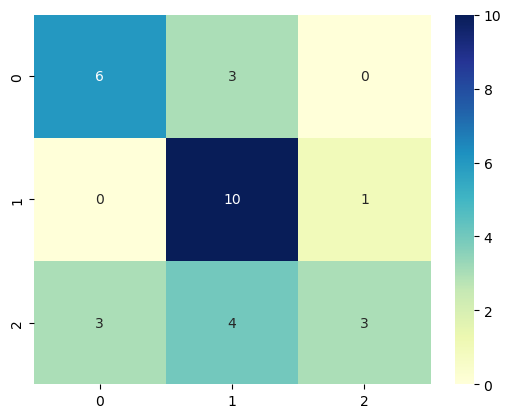

In [101]:
# Classification report and Confusion matrix of Decision Tree Algorithm

from sklearn.metrics import classification_report, confusion_matrix
CM_DT=confusion_matrix(y_test1, DT_Algorithm_Prediction)
sns.heatmap(CM_DT, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, DT_Algorithm_Prediction))

In [41]:
#Logistic Regression Algo

from sklearn.linear_model import LogisticRegression
LR_Algorithm = LogisticRegression()
LR_Algorithm.fit(x_train1, y_train1)
LR_Algorithm_Prediction = LR_Algorithm.predict(x_test1)
Accuracy_LR = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Logistic Regression Algorithm', Accuracy_LR)

Accuracy of Logistic Regression Algorithm 0.5333333333333333


In [42]:
LR_Algorithm_Prediction

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 2, 0, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.58      0.64      0.61        11
           2       0.50      0.20      0.29        10

    accuracy                           0.53        30
   macro avg       0.53      0.54      0.50        30
weighted avg       0.53      0.53      0.50        30



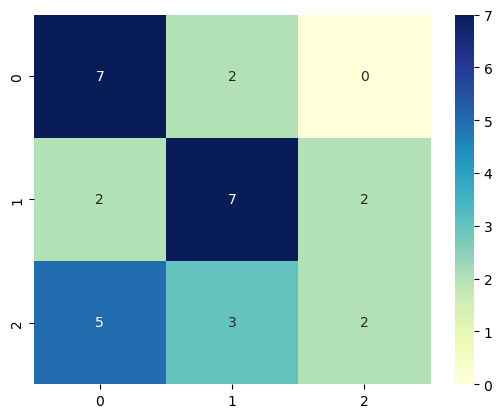

In [104]:
#Classification report and Confusion matrix of Logistic Regression Algorithm

from sklearn.metrics import classification_report, confusion_matrix
CM_LR=confusion_matrix(y_test1, LR_Algorithm_Prediction)
sns.heatmap(CM_LR, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, LR_Algorithm_Prediction))

In [43]:
# Support Vector Machine Algorithm

from sklearn.svm import SVC
SVM_Algorithm = SVC()
SVM_Algorithm.fit(x_train1, y_train1)
SVM_Algorithm_Prediction = SVM_Algorithm.predict(x_test1)
Accuracy_SVM = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Support Vector Machine Algorithm', Accuracy_SVM)

Accuracy of Support Vector Machine Algorithm 0.5333333333333333


In [44]:
SVM_Algorithm_Prediction

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.31      0.56      0.40         9
           1       0.43      0.55      0.48        11
           2       0.00      0.00      0.00        10

    accuracy                           0.37        30
   macro avg       0.25      0.37      0.29        30
weighted avg       0.25      0.37      0.30        30



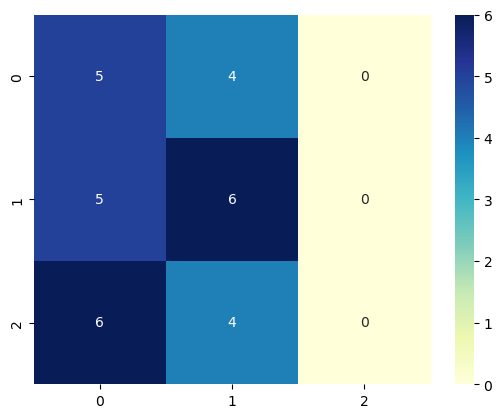

In [108]:
# Support Vector Machine Algorithm

from sklearn.svm import SVC
SVM_Algorithm = SVC()
SVM_Algorithm.fit(x_train1, y_train1)
SVM_Algorithm_Prediction = SVM_Algorithm.predict(x_test1)
Accuracy_SVM = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Support Vector Machine Algorithm', Accuracy_SVM)

Text(0.5, 1.0, 'Comparison Graph of all the Algorithm')

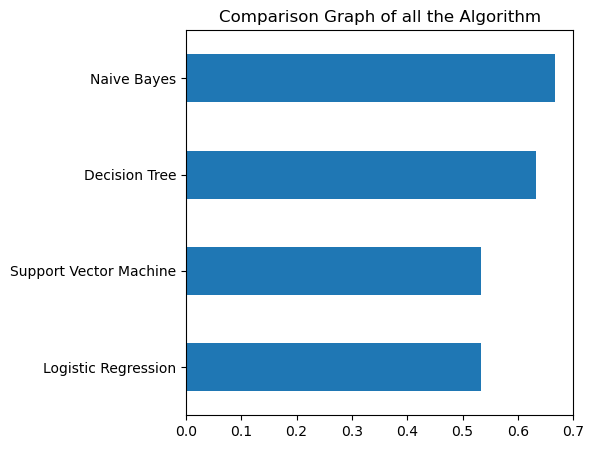

In [45]:
# Comparison Plot of all the Graph

model_accuracy = pd.Series(data=[Accuracy_NB,Accuracy_DT,Accuracy_LR,Accuracy_SVM], 
                index=['Naive Bayes','Decision Tree','Logistic Regression','Support Vector Machine'])
fig= plt.figure(figsize=(5,5))
model_accuracy.sort_values().plot.barh()
plt.title('Comparison Graph of all the Algorithm')

In [46]:
#Final Prediction Model

Final_Prediction_data = (71,1,32,20,1)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is High


In [47]:
Final_Prediction_data = (10,2,32,20,1)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is Medium


In [48]:
Final_Prediction_data = (40,2,32,21,0)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is Low


In [49]:
Final_Prediction_data = (40,2,32,21,0)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = NB_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is Low
